/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


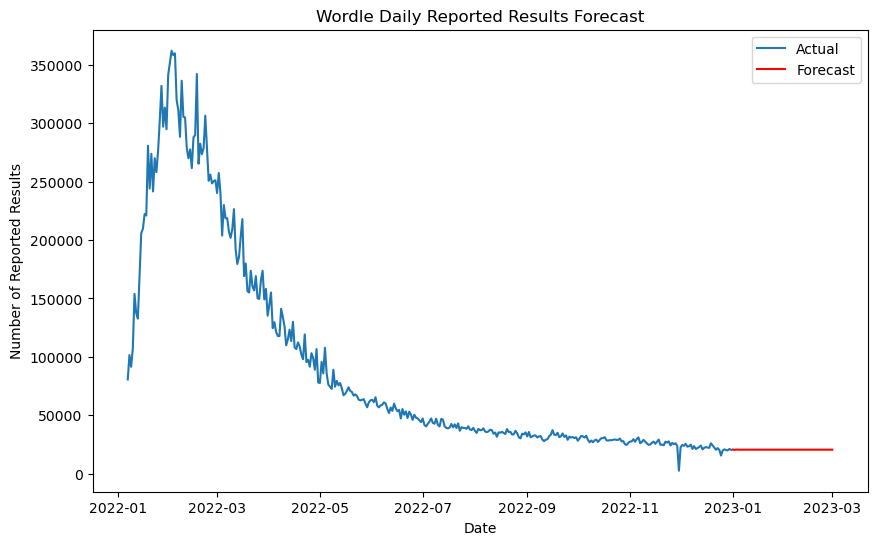

20585.375235281

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from datetime import datetime

# 数据预处理
# 读取数据，跳过第一行（列标题）
wordle_data = pd.read_excel('/home/ebotian/MCM/Problem_C_Data_Wordle.xlsx', skiprows=1)

# 转换日期列为 datetime 类型
wordle_data['Date'] = pd.to_datetime(wordle_data['Date'])

# 确保数据按日期排序
wordle_data.sort_values('Date', inplace=True)

# 提取每日报告结果的数量
daily_reported_results = wordle_data.set_index('Date')['Number of reported results']

# 时间序列分析 - ARIMA模型
# 为简化起见，这里选择一个自动ARIMA模型，自动选择最佳的参数
model = ARIMA(daily_reported_results, order=(5,1,0))
model_fit = model.fit()

# 预测未来的报告结果数量
forecast = model_fit.forecast(steps=60)  # 预测未来60天的数据

# 绘制预测图
plt.figure(figsize=(10,6))
plt.plot(daily_reported_results, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Wordle Daily Reported Results Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Reported Results')
plt.legend()
plt.show()

# 输出预测的特定日期（2023年3月1日）的结果
forecast_date = '2023-03-01'
forecast_value = forecast.get(forecast_date, None)
forecast_value

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 定义一个函数来提取单词特征
def extract_features(word):
    return {
        "length": len(word),
        "vowels": sum(c in 'aeiou' for c in word),
        "consonants": sum(c not in 'aeiou' for c in word)
    }

# 应用特征提取
wordle_data["features"] = wordle_data["Word"].apply(extract_features)
wordle_features = wordle_data["features"].apply(pd.Series)

# 准备模型数据
X = wordle_features
y = wordle_data[['1 try', '2 tries', '3 tries', '4 tries', '5 tries', '6 tries', '7 or more tries (X)']]

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测和评估
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 预测特定单词
word_to_predict = "eerie"
word_features = extract_features(word_to_predict)
prediction = model.predict([list(word_features.values())])
print(f"Predicted distribution for '{word_to_predict}': {prediction}")
# 读取实际上传的数据文件
file_path = '/home/ebotian/MCM/Problem_C_Data_Wordle.xlsx'
wordle_data = pd.read_excel(file_path, skiprows=1)

# 预览数据以确定其结构和可用性
wordle_data.head()

Mean Squared Error: 30.400278156757626
Predicted distribution for 'eerie': [[ 0.59607431  6.31148624 21.58231112 31.77967114 24.82252407 12.50895985
   2.68833795]]


/usr/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Unnamed: 0       Date  Contest number   Word  Number of reported results  \
0         NaN 2022-12-31             560  manly                       20380   
1         NaN 2022-12-30             559  molar                       21204   
2         NaN 2022-12-29             558  havoc                       20001   
3         NaN 2022-12-28             557  impel                       20160   
4         NaN 2022-12-27             556  condo                       20879   

   Number in hard mode  1 try  2 tries  3 tries  4 tries  5 tries  6 tries  \
0                 1899      0        2       17       37       29       12   
1                 1973      0        4       21       38       26        9   
2                 1919      0        2       16       38       30       12   
3                 1937      0        3       21       40       25        9   
4                 2012      0        2       17       35       29       14   

   7 or more tries (X)  
0                    2  
1                    1  
2                    2  
3                    1  
4                    3

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 重新加载数据
file_path = '/home/ebotian/MCM/Problem_C_Data_Wordle.xlsx'
wordle_data = pd.read_excel(file_path, skiprows=1)

# 定义一个函数来提取单词特征
def extract_features(word):
    return {
        "length": len(word),
        "vowels": sum(c in 'aeiou' for c in word),
        "consonants": sum(c not in 'aeiou' for c in word)
    }

# 应用特征提取
wordle_features = wordle_data["Word"].apply(lambda x: pd.Series(extract_features(x)))

# 准备模型数据
X = wordle_features
y = wordle_data[['1 try', '2 tries', '3 tries', '4 tries', '5 tries', '6 tries', '7 or more tries (X)']]

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测和评估
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# 预测特定单词
word_to_predict = "eerie"
word_features = extract_features(word_to_predict)
prediction = model.predict([list(word_features.values())])

mse, prediction

/usr/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


(31.11898954754775,
 array([[ 0.50439325,  6.59253508, 22.31996736, 32.17087839, 24.35234722,
         11.83348878,  2.42330221]]))